This mini-project is to  classify movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

In [1]:
# import packages
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

The IMDB dataset comes packaged with TensorFlow. It has already been preprocessed such that the reviews (sequences of words) have been converted to sequences of integers, where each integer represents a specific word in a dictionary.

In [2]:
#road dataset 
data = keras.datasets.imdb 

In [66]:
# split into train and test
(x_train, y_train), (x_test, y_test) = data.load_data(num_words = 10000)

The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. The rare words are discarded to keep the size of the data manageable.

In [67]:
# Explore the data 

#find the length of training set and labels set
print("Training entries: {}, labels: {}".format(len(x_train), len(y_train)))

Training entries: 25000, labels: 25000


The text of reviews have been converted to integers, where each integer represents a specific word in a dictionary. Here’s what the first review looks like:

In [68]:
# show the first review 
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Movie reviews may be different lengths. The below code shows the number of words in the first and second reviews. Since inputs to a neural network must be the same length, we’ll need to resolve this later.

In [69]:
print("first review length: {}".format(len(x_train[0])))
print("Second review legth: {}".format(len(x_train[1])))

first review length: 218
Second review legth: 189


It may be useful to know how to convert integers back to text. Here, we’ll create a helper function to query a dictionary object that contains the integer to string mapping:

In [70]:
# A dictionary mapping words to an integer index
word_index = data.get_word_index()

# The first indices are reserved
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

Now we can use the decode_review function to display the text for the first review:

In [71]:
# decode the first review from integer to text
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Prepare the data
The reviews—the arrays of integers—must be converted to tensors before fed into the neural network. This conversion can be done a couple of ways:

- Convert the arrays into vectors of 0s and 1s indicating word occurrence, similar to a one-hot encoding. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network—a Dense layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a num_words * num_reviews size matrix.

- Alternatively, we can pad the arrays so they all have the same length, then create an integer tensor of shape max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network.

In [72]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [73]:
# check the shape of sample data 
len(x_train[0]), len(x_train[1])

(256, 256)

In [74]:
# lets observe a sigle values 
print(x_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### Build the model

Create a model for text classification 

In [75]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 160,561
Trainable params: 160,561
Non-trainable params: 0
_________________________________________________________________


A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), we’ll use the binary_crossentropy loss function.

In [76]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Create a validation set

When training, we want to check the accuracy of the model on data it hasn’t seen before. Create a validation set by setting apart 3,000 examples from the original training data. (Why not use the testing set now? Our goal is to develop and tune our model using only the training data, then use the test data just once to evaluate our accuracy).

In [77]:
# split train into train set and validation set
x_val = x_train[:3000]
partial_x_train = x_train[3000:]

y_val = y_train[:3000]
partial_y_train = y_train[3000:]

Train the model for 40 epochs in mini-batches of 512 samples. This is 40 iterations over all samples in the x_train and y_train tensors. While training, monitor the model’s loss and accuracy on the 10,000 samples from the validation set:

In [78]:
# train the model 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

Train on 22000 samples, validate on 3000 samples
Epoch 1/8
22000/22000 - 3s - loss: 0.6895 - accuracy: 0.6662 - val_loss: 0.6833 - val_accuracy: 0.7050
Epoch 2/8
22000/22000 - 2s - loss: 0.6627 - accuracy: 0.7572 - val_loss: 0.6371 - val_accuracy: 0.7800
Epoch 3/8
22000/22000 - 2s - loss: 0.5810 - accuracy: 0.8145 - val_loss: 0.5324 - val_accuracy: 0.8133
Epoch 4/8
22000/22000 - 2s - loss: 0.4560 - accuracy: 0.8526 - val_loss: 0.4190 - val_accuracy: 0.8497
Epoch 5/8
22000/22000 - 2s - loss: 0.3519 - accuracy: 0.8791 - val_loss: 0.3494 - val_accuracy: 0.8670
Epoch 6/8
22000/22000 - 2s - loss: 0.2893 - accuracy: 0.8938 - val_loss: 0.3170 - val_accuracy: 0.8790
Epoch 7/8
22000/22000 - 2s - loss: 0.2505 - accuracy: 0.9078 - val_loss: 0.2997 - val_accuracy: 0.8780
Epoch 8/8
22000/22000 - 2s - loss: 0.2219 - accuracy: 0.9185 - val_loss: 0.2889 - val_accuracy: 0.8833



And let’s see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [79]:
results = model.evaluate(x_test, y_test)

print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2961275595569611, 0.87764]


### Evaluate by using Training and Validation Accuracy

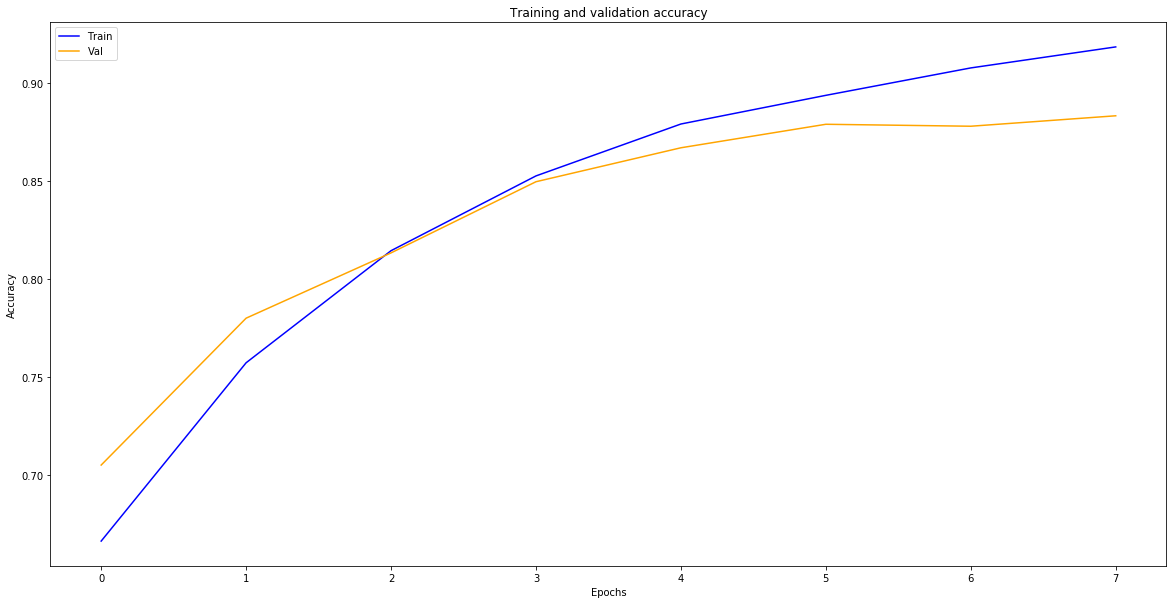

In [80]:
#get stats from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

# plot accuracy vs epochs 
plt.figure(figsize=(20,10))
plt.title('Training and validation accuracy')
plt.plot(epochs,acc, color='blue',label="Train")
plt.plot(epochs,val_acc, color='orange', label="Val")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Evaluate by using Training and Validation Loss

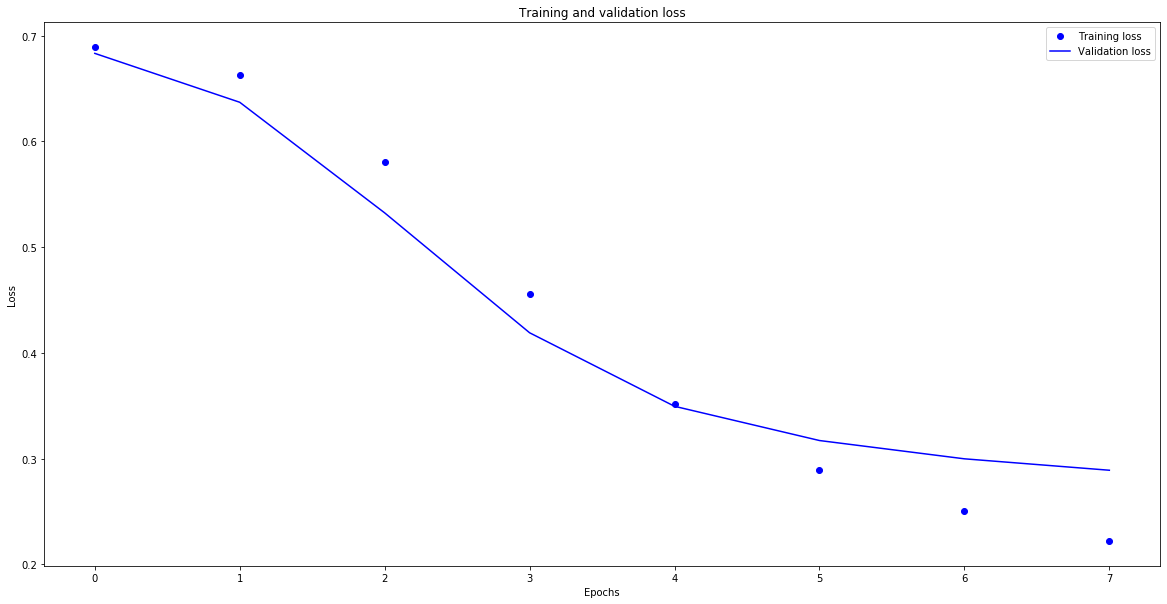

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20,10))
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [84]:
# save the model
model.save("models/imdb_model.h5")